# DATA & PACKAGE PREPARATION

In [ ]:
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
os.listdir()

['.config', 'sample_data']

In [ ]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

FileNotFoundError: ignored

# DATA CLEANSING

In [ ]:
#check if number data has irreguler value
df.describe()
#Result :OK

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation:
* `SeniorCitizen` column actually a categorial data, with the value from 1 and 0 (integer)
* `TotalCharges` column actually a numeric data 
* all column have 7043 rows and range index 7043, data doesnt have any null or nan data


In [ ]:
#lets change Senior Citizen to yes or no values,cause we will separate numerical and categorial in next step
df['SeniorCitizen']=df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

In [ ]:
#in Total charge column there is a white space value, thats why we cant change it to float
df[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df[['customerID','tenure','MonthlyCharges','TotalCharges']][df['TotalCharges']==' ']

In [ ]:
#tenure 0 it means customers under 1 month so total charges = 0
#it's likely costumers with 0 are customers who just joint our service in the middle or end of month
#i think it's better if we dont remove it, because it's indicate newcomers
df['TotalCharges'].replace(" ", 0, inplace=True)
#change dtype of Total Charge as integer
df['TotalCharges']=df['TotalCharges'].apply(float)
df['TotalCharges'].dtypes

dtype('float64')

In [ ]:
# check if the column have null/na as different values
for column in df:
    print(column,'\n',df[column].unique())
#result: OK

customerID 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender 
 ['Female' 'Male']
SeniorCitizen 
 ['No' 'Yes']
Partner 
 ['Yes' 'No']
Dependents 
 ['No' 'Yes']
tenure 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService 
 ['No' 'Yes']
MultipleLines 
 ['No phone service' 'No' 'Yes']
InternetService 
 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 
 ['No' 'Yes' 'No internet service']
OnlineBackup 
 ['Yes' 'No' 'No internet service']
DeviceProtection 
 ['No' 'Yes' 'No internet service']
TechSupport 
 ['No' 'Yes' 'No internet service']
StreamingTV 
 ['No' 'Yes' 'No internet service']
StreamingMovies 
 ['No' 'Yes' 'No internet service']
Contract 
 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 
 ['Yes' 'No']
PaymentMethod 
 ['Electronic check' 'Mailed check' '

Result :OK,df doesnt have any values that equal to null or nan 

In [ ]:
#Check if there is duplicate
df.duplicated(['customerID']).value_counts()

False    7043
dtype: int64

Result :OK, df doesnt have any duplicated rows

# EXPLORATORY DATA

## Statistical summary

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Grouping data
categoricals = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
numericals = ['tenure','MonthlyCharges','TotalCharges',]

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Observation:
* Overall, the minimum and maximum values make sense for each column
* Mean > 50% (Median) in `tenure` column, indicating slight positively skewed distribution
* Mean < 50% (Median) in `MonthlyCharges` column, indicating slight negatively skewed distribution
* in `TotalCharges` column, indicating skewed distribution

In [ ]:
df[categoricals].describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


## Univariate Analysis

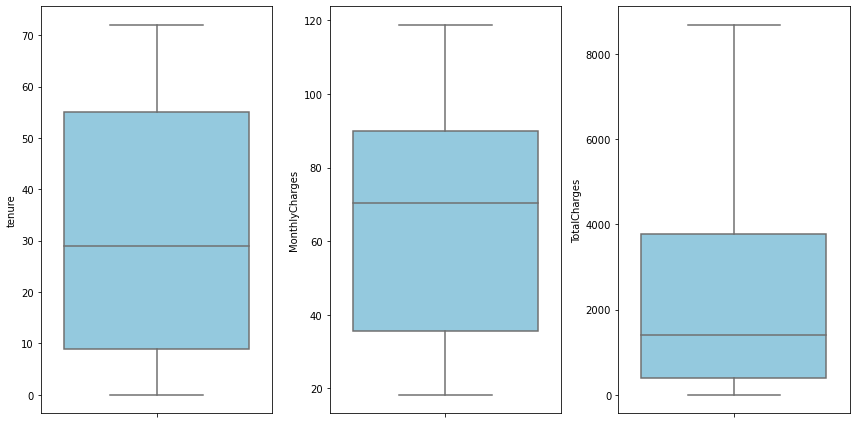

In [ ]:
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

Result :OK, column doesnt have any outliner

E:\Program\Anaconda3\envs\bismillah\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Program\Anaconda3\envs\bismillah\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Program\Anaconda3\envs\bismillah\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

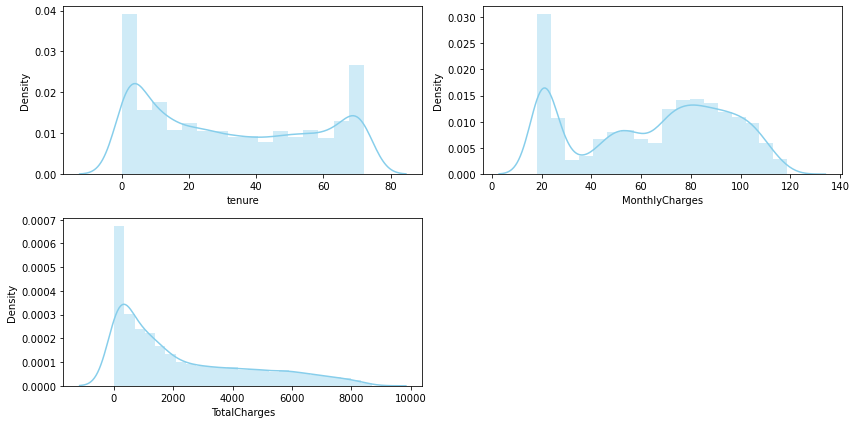

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

<AxesSubplot:>

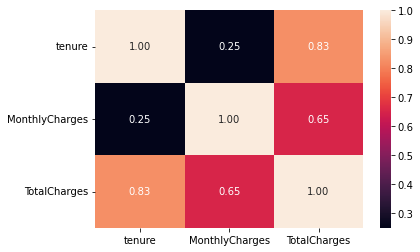

In [ ]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

## Bivariate Analysis

E:\Program\Anaconda3\envs\bismillah\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


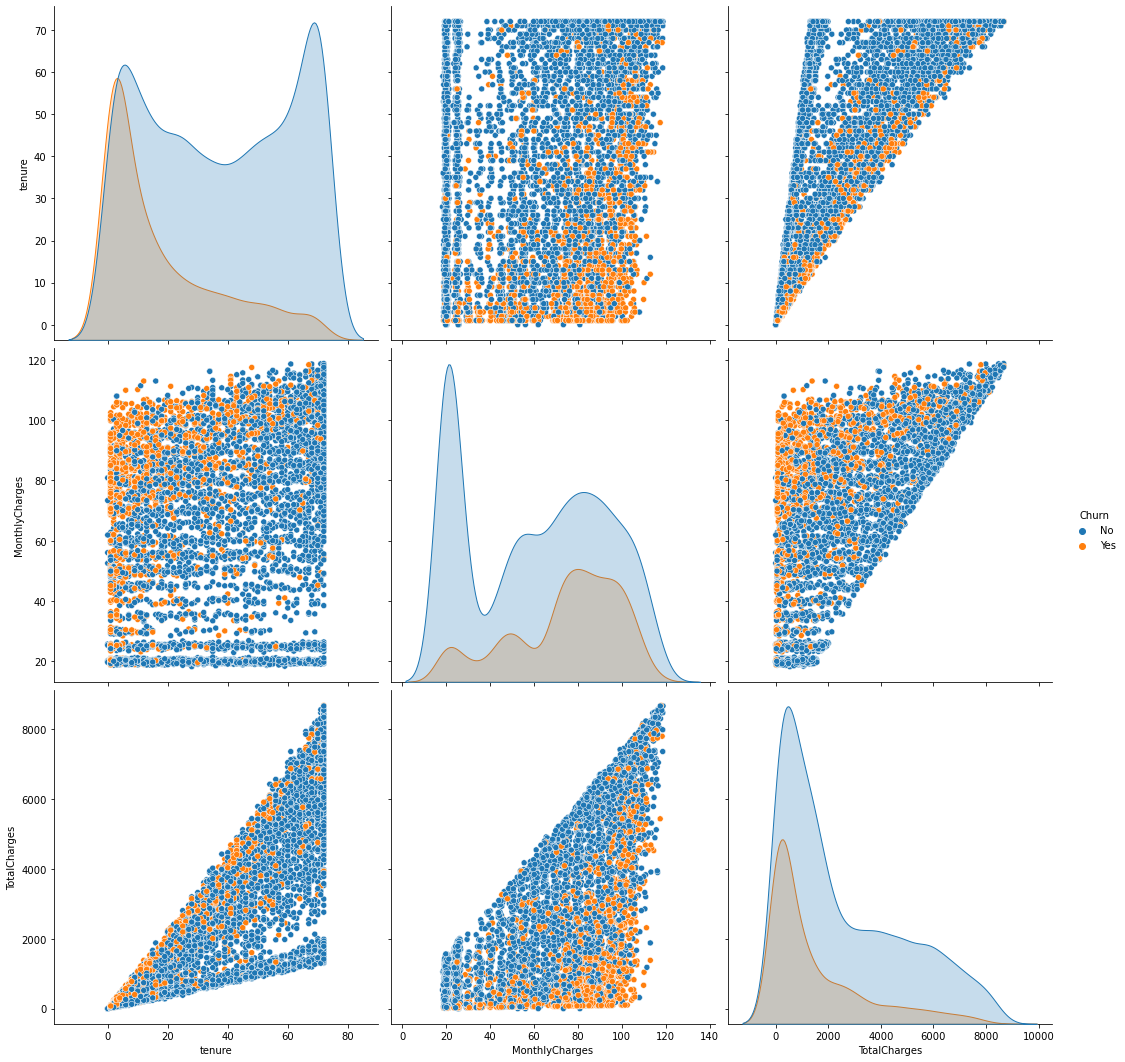

In [ ]:
sns.pairplot(df, hue='Churn',size=(5))

observation:
* from `tenure` distribution plot we can see that most churn are people with 0-10 month with our service,while customers dont leave us are tend to distributes around
* from `tenure` and `monthly charges` scatter plot we can see churn customers distribute around the parameter but there's small amount percentage that gather around with `monthly charges` higher price and within 0-12 month. While customers that dont leave tend to distributed everywhere


E:\Program\Anaconda3\envs\bismillah\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Program\Anaconda3\envs\bismillah\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Program\Anaconda3\envs\bismillah\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

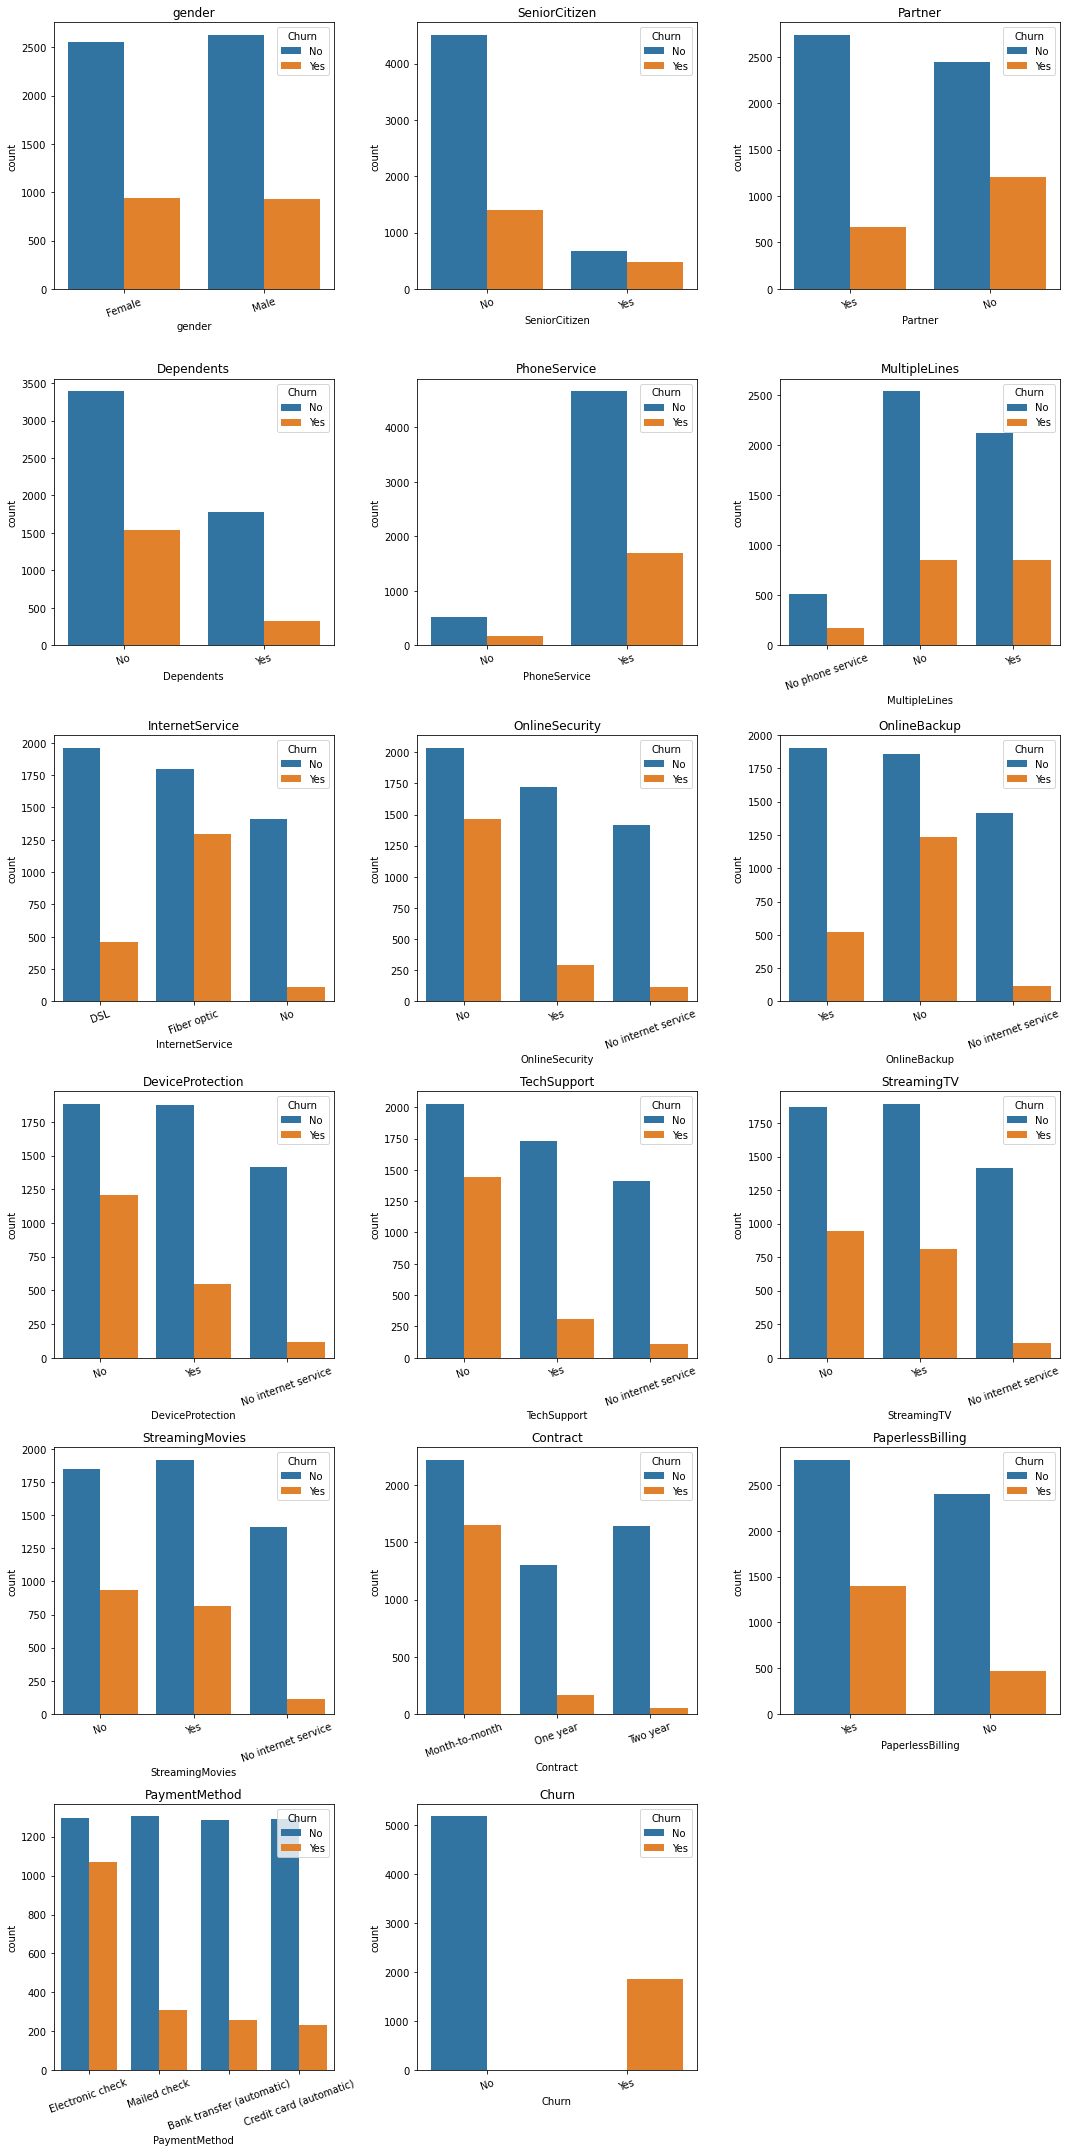

In [ ]:
features = categoricals

plt.figure(figsize = (15, 30))
for i in enumerate(features):
    plt.subplot(6, 3,i[0]+1)
    sns.countplot(i[1], hue = 'Churn', data = df).set(title=i[1])
    plt.xticks(rotation = 20)
plt.tight_layout()

Observation:
* `SeniorCitizen` most of customers are young people, SeniorCitizen customers tend to leave our serivice than younger people
* `partner` customers who dont have Partner tend to leave our service
* `Dependents` customers who Dependents tend to leave our service
* `PhoneService` most customers use PhoneService
* `InternetService` customers who use fiber optic tend to leave our service,while only little percentage customers use DSL and no internet service that leave 
* `OnlineSecurity` customers without OnlineSecurity service tend to leave our service
* `OnlineBackup` customerscustomers with OnlineBackup service tend to leave our service
* `DeviceProtection` customers with DeviceProtection service tend to leave our service
* `TechSupport` there is significant difference between customers that use Techsupport and dont,customers whitout Tech Support tend to leave our service.
* `StreamingTV`,`Streaming Movie` there is no significant trend difference between customers Who use or dont use service
* `Contract` there is significant difference between customers month to month contract than others, customers with month to month
* `Pepperless biling` customers with Pepperless billing tend to leave than others method
* `Payment Method` there is significant difference between customers Electronic Check than others, customers with Electronic Check tend to leave than others method


In [ ]:
#check if it's true that most of our churn customers are people within 0-12
total_churn=len(df[df['Churn']=='Yes'])
Churn_under1year=len(df[(df['tenure']<=12)&(df['Churn']=='Yes')])
round(Churn_under1year/total_churn*100,2)

55.48

# EDA Conclusion
1. The data does not contain any isue. The data it self free from outliner, duplicate, and, null/nan value.
2. Overall, the minimum and maximum values make sense for each column.
3. Most of the columns with numerical values are skeewed either to left or right, none of them are normal distribution.
4. From correlation heatmap: We can see that `TotalCharges` is correlated with `MonthlyCharges`. We can choose either of them for modelling. The reason why `TotalCharges` highly corelated because `TotalCharges` is sum of fee that customers must pay `MonthlyCharges` as long as they stay with our service (tenure) 
5. from `tenure` and `monthly charges` scatter plot we can see churn customers distribute around the parameter but there's small amount percentage that gather around with `monthly charges` higher price and 55 % of our churn customers are within 0-12 month.
6. from `Online security`,`Techsupport`,`DeviceProtection`,`OnlineBackup`,`DeviceProtection` and `Tech Support` we can see customers who has internet and dont include protection service likely to churn. it seems who dont use protection service are attacked by hacker or somekind threat to costumers and they dont use our internet service anymore because of that.

Recomendation:
* 1.To prevent Customers to leave we can offer free trial `OnlineSecurity` at least for 1 year, and then give report what threat that tried to attack our costumers, so they are more aware what danger internet whitout protection
* 2.otheher method that for new costumers `OnlineSecurity` is always included in all our package with internet,Of course with price in mind that our new package price will be rise

# Deep-dive exploration

## EDA Questions
1. What are the maximum tenure that use Fiber Optic service
2. Who are the most loyal customers? and who the most money spender? 
3. if tenure is time customers stay with us, why TotalCharges not same as Monthlycharge*tenure?
with new variable over that we got from question number 3
4. who are top 10 customers tend to overcharge ? who are top 10 customers likely accept our discount offer?


In [ ]:
# What are the maximum tenure that use Fiber Optic service
df.groupby(['Churn','InternetService']).agg(max_tenure=('tenure','max'),min_tenure=('tenure','min'),
                                            median_tenure=('tenure','median')).reset_index()

NameError: ignored

In [ ]:
# Who are the most loyal customers?
df[df['Churn']=='No'].sort_values('tenure',ascending=False).reset_index().head(10)

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4263,2121-JAFOM,Female,No,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),115.55,8312.40,No
1,4408,2824-DXNKN,Female,No,Yes,Yes,72,Yes,Yes,DSL,...,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),71.45,5025.85,No
2,2117,4139-DETXS,Female,No,Yes,Yes,72,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),64.45,4528.00,No
3,6182,2925-VDZHY,Male,No,Yes,Yes,72,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),88.70,6501.35,No
4,4336,3244-CQPHU,Female,Yes,No,No,72,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.10,7746.70,No
5,6189,4718-WXBGI,Male,No,Yes,Yes,72,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.95,6614.90,No
6,4310,8908-NMQTX,Male,No,No,No,72,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),65.60,4566.50,No
7,2160,7101-HRBLJ,Female,No,Yes,Yes,72,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),83.70,6096.90,No
8,2177,2878-RMWXY,Male,Yes,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),102.65,7550.30,No
9,632,1775-KWJKQ,Male,No,Yes,Yes,72,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.85,6562.90,No


In [ ]:
# who the most money spender? 
df[df['Churn']=='No'].sort_values('TotalCharges',ascending=False).reset_index().head(10)

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4586,7569-NMZYQ,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,6768,9739-JLPQJ,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
2,5347,9788-HNGUT,Male,No,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
3,2187,8879-XUAHX,Male,No,Yes,No,71,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No
4,6118,9924-JPRMC,Male,No,No,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
5,5558,0675-NCDYU,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.40,8543.25,No
6,2368,6650-BWFRT,Female,No,Yes,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No
7,2603,0164-APGRB,Female,No,No,No,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.90,8496.70,No
8,2025,1488-PBLJN,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.85,8477.70,No
9,2115,8984-HPEMB,Female,No,No,No,71,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No


In [ ]:
# if tenure is time customers stay with service, why TotalCharges not same as Monthlycharge*tenure?
tenur=df[['customerID','tenure','MonthlyCharges','TotalCharges']]
tenur['acc_charges']=tenur['MonthlyCharges'] * tenur['tenure']
print(len(tenur))
print(len(tenur[tenur['MonthlyCharges'] == tenur['acc_charges']]))

7043
613


C:\Users\USER\AppData\Local\Temp\ipykernel_9912\2539698164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenur['acc_charges']=tenur['MonthlyCharges'] * tenur['tenure']


There is difference between MonthlyCharges and Accumulate charges

In [ ]:
tenur

,customerID,tenure,MonthlyCharges,TotalCharges,acc_charges
0,7590-VHVEG,1,29.85,29.85,29.85
1,5575-GNVDE,34,56.95,1889.50,1936.30
2,3668-QPYBK,2,53.85,108.15,107.70
3,7795-CFOCW,45,42.30,1840.75,1903.50
4,9237-HQITU,2,70.70,151.65,141.40
...,...,...,...,...,...
7038,6840-RESVB,24,84.80,1990.50,2035.20
7039,2234-XADUH,72,103.20,7362.90,7430.40
7040,4801-JZAZL,11,29.60,346.45,325.60
7041,8361-LTMKD,4,74.40,306.60,297.60


there is some `TotalCharges` that seems higher and other lower,but not too far from `acc_Charges`
My assumtion that this company that own this data have certain program that we dont have that data.

it's likely the data is whetever customers got some discount or promo for those under the value of Acc_Charges.
how about who pass the acc_Charges? my assumtion that Customers likely pass quote of our pacakage or buy extra service

In [ ]:
# who are the top 10 customers tend to overcharge ?
tenur['Over']=tenur['TotalCharges'] - tenur['acc_charges']
tenur.sort_values('Over',ascending=False).reset_index().head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_9912\3468348537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenur['Over']=tenur['TotalCharges'] - tenur['acc_charges']


,index,customerID,tenure,MonthlyCharges,TotalCharges,acc_charges,Over
0,1418,9350-VLHMB,67,89.55,6373.10,5999.85,373.25
1,6596,0083-PIVIK,64,81.25,5567.55,5200.00,367.55
2,1274,7182-OVLBJ,62,101.15,6638.35,6271.30,367.05
3,152,1679-JRFBR,70,108.15,7930.55,7570.50,360.05
4,2187,8879-XUAHX,71,116.25,8564.75,8253.75,311.00
5,5009,0052-DCKON,66,115.80,7942.15,7642.80,299.35
6,3787,2386-OWURY,58,95.30,5817.70,5527.40,290.30
7,588,0742-LAFQK,72,99.15,7422.10,7138.80,283.30
8,5764,0716-BQNDX,57,93.75,5625.55,5343.75,281.80
9,2816,0536-ACXIP,72,109.55,8165.10,7887.60,277.50


In [ ]:
# who are the top 10 customers tend to buy discount offer ?
tenur.sort_values('Over',ascending=True).reset_index().head(10)

,index,customerID,tenure,MonthlyCharges,TotalCharges,acc_charges,Over
0,1746,3963-RYFNS,72,116.45,8013.55,8384.40,-370.85
1,1997,0266-CLZKZ,67,105.65,6717.90,7078.55,-360.65
2,2337,4612-THJBS,56,104.75,5510.65,5866.00,-355.35
3,3200,0895-DQHEW,54,104.30,5278.15,5632.20,-354.05
4,3634,3258-SYSWS,72,113.80,7845.80,8193.60,-347.80
5,2264,7176-WRTNX,70,114.95,7711.25,8046.50,-335.25
6,6710,4342-HFXWS,48,69.70,3023.65,3345.60,-321.95
7,4086,2235-EZAIK,72,79.20,5401.90,5702.40,-300.50
8,6582,9558-IHEZX,71,106.75,7283.25,7579.25,-296.00
9,5028,0254-FNMCI,72,109.90,7624.20,7912.80,-288.60


# Deep-Dive Conclusion
* 1.From question number 2 we can see customers who are most loyal and spender in our service
* 2.From quesino number 3, our costumers got some discount or promo for those under the value of Acc_Charges, and people pass the value are customers who pass quote of our pacakage or buy extra service
* 3.We can see custumers who are likely to buy our extra package and people who overcharge themeself

Recomendation:
1. from conclusion no. 2 we can give some sort appreciation for always staying with our service. that's give costumers feels special, in the end that customers willing to recomend our service to other people and keep stay with us. lastly we can give a questioner what make he/her always stay with our services.
2. from conclusion no. 3 we can give a new offer to customers who overcharge to buy our package promo, and who are under value, that cusomers tend to buy our package promo why not offer them extra boost speed package or quota with short amount date of contract (about 15 day-30 days)